In [15]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [16]:
data = yf.download("^GSPC", start="2020-01-01", end="2023-03-29")
df = pd.DataFrame(data)
df.to_csv("sp500.csv")

[*********************100%%**********************]  1 of 1 completed


In [17]:
read_df = pd.read_csv("sp500.csv")
read_df.set_index("Date", inplace=True) #first series of number in.csv but later it has been replaced with Date
read_df.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


In [18]:
read_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
features = ['Open', 'High', 'Low', 'Volume']
scaler = MinMaxScaler() #scale data
X = scaler.fit_transform(read_df[features])
X = pd.DataFrame(columns=features, data=X, index=read_df.index)
X.head()

,Open,High,Low,Volume
Date,,,,
2020-01-02,0.379489,0.380243,0.403245,0.212026
2020-01-03,0.372206,0.375481,0.398149,0.215021
2020-01-06,0.368701,0.375755,0.395173,0.241353
2020-01-07,0.378371,0.374989,0.402047,0.209122
2020-01-08,0.377071,0.383790,0.403685,0.244301


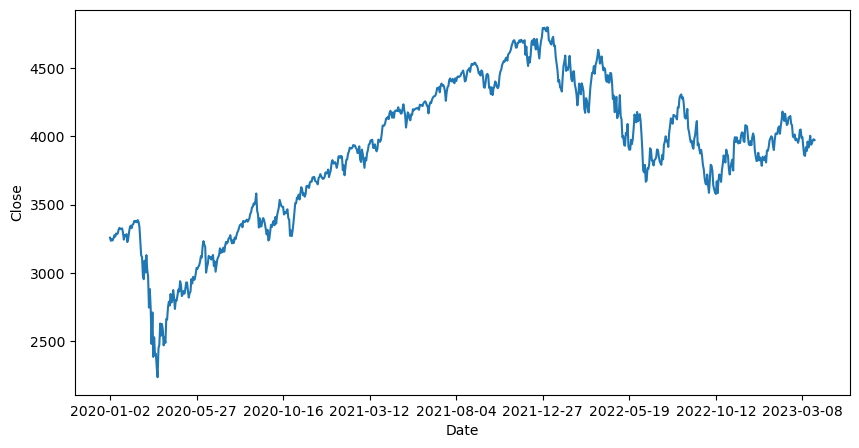

In [22]:
'''trực quan kết quả cần đoán'''
fig, siz = plt.subplots(figsize = (10,5))
read_df['Adj Close'].plot()
siz.set_xlabel('Date')
siz.set_ylabel('Close')
plt.show()

In [23]:
'''thay vì sử dụng train test split như bình thường ta sử dụng time_series_split cho bien thời gian'''
y = pd.DataFrame(read_df['Adj Close'])

,Open,High,Low,Volume
Date,,,,
2020-01-02,0.379489,0.380243,0.403245,0.212026
2020-01-03,0.372206,0.375481,0.398149,0.215021
2020-01-06,0.368701,0.375755,0.395173,0.241353
2020-01-07,0.378371,0.374989,0.402047,0.209122
2020-01-08,0.377071,0.383790,0.403685,0.244301
